In [1]:
import streamlit as st
import yfinance as finance

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

# Set the title name, sidebar header, and Subheading

In [2]:
start = '2009-12-12'
end = '2021-12-12'

df = data.DataReader('AApL','yahoo',start,end)
print(df.shape)
df.head()

2022-01-27 00:10:27.932 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


(3020, 6)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-14,7.051071,6.877143,6.977500,7.035000,495790400.0,6.031563
2009-12-15,7.053929,6.902500,6.993929,6.934643,419459600.0,5.945521
2009-12-16,7.017857,6.948214,6.967857,6.965357,352984800.0,5.971854
2009-12-17,6.964286,6.821429,6.937857,6.852143,388838800.0,5.874787
2009-12-18,6.982143,6.878571,6.898929,6.979643,608770400.0,5.984102


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-06,167.880005,164.279999,164.289993,165.320007,107497000.0,165.320007
2021-12-07,171.580002,168.339996,169.080002,171.179993,120405400.0,171.179993
2021-12-08,175.960007,170.699997,172.130005,175.080002,116998900.0,175.080002
2021-12-09,176.750000,173.919998,174.910004,174.559998,108923700.0,174.559998
2021-12-10,179.630005,174.690002,175.210007,179.449997,115228100.0,179.449997


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-14,7.051071,6.877143,6.977500,7.035000,495790400.0,6.031563
1,2009-12-15,7.053929,6.902500,6.993929,6.934643,419459600.0,5.945521
2,2009-12-16,7.017857,6.948214,6.967857,6.965357,352984800.0,5.971854
3,2009-12-17,6.964286,6.821429,6.937857,6.852143,388838800.0,5.874787
4,2009-12-18,6.982143,6.878571,6.898929,6.979643,608770400.0,5.984102


In [5]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.051071,6.877143,6.977500,7.035000,495790400.0
1,7.053929,6.902500,6.993929,6.934643,419459600.0
2,7.017857,6.948214,6.967857,6.965357,352984800.0
3,6.964286,6.821429,6.937857,6.852143,388838800.0
4,6.982143,6.878571,6.898929,6.979643,608770400.0


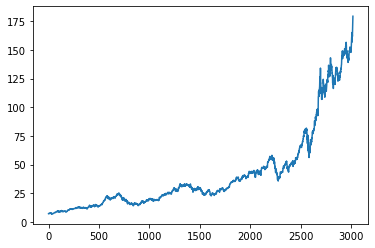

In [6]:
plt.plot(df['Close'])

In [7]:
ma100 = df.Close.rolling(100, win_type ='triang').mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3015    147.697922
3016    147.748404
3017    147.810994
3018    147.887336
3019    147.979058
Name: Close, Length: 3020, dtype: float64

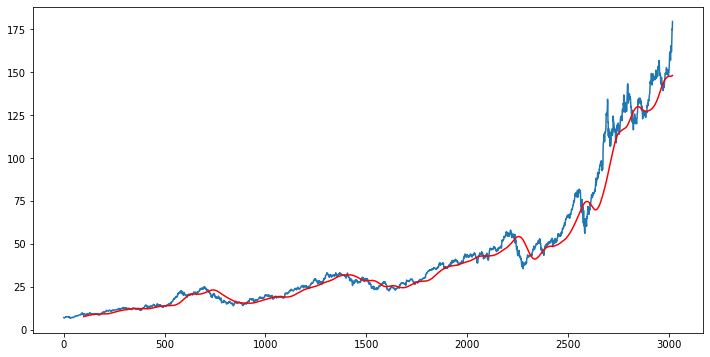

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200, win_type ='triang').mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3015    139.696775
3016    139.900483
3017    140.105181
3018    140.310817
3019    140.517112
Name: Close, Length: 3020, dtype: float64

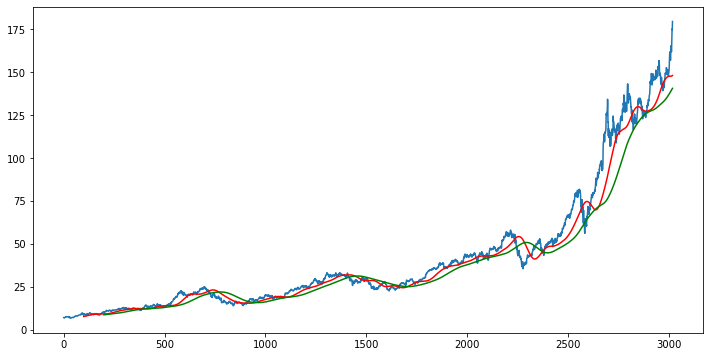

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.plot(ma200,'g')

# Spliting data train and test

In [11]:
train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test = pd.DataFrame(df['Close'][int(len(df)*0.70):])
print(train.shape)
print(test.shape)

(2114, 1)
(906, 1)


In [12]:
test.head()

,Close
2114,46.840000
2115,47.509998
2116,47.147499
2117,47.037498
2118,46.610001


In [13]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train)

##### To understand the methodology of how we predict next price of the stream of ( Close data ) we take in consideration for example last ten prices in Close and depending on them we predict next number in consequece ,  In the next iteration we forget first used number of the ten numbers and insert to them the last predicted number to make our new prediction.

First predict : 25 63 87 96 54 23 58 44 55 65 >> 44      ->     second predict : 63 87 96 54 23 58 44 55 65 44  >>  33

In [14]:
x_train = []
y_train = []

for i in range(100 , scaled_train.shape[0]):
    x_train.append(scaled_train[i-100 :i])
    y_train.append(scaled_train[i,0])
    
x_train , y_train = np.array(x_train) , np.array(y_train)


In [38]:
model = Sequential()
model.add(LSTM(units=50 , activation ='relu' , return_sequences=True , input_shape = (x_train.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 , activation ='relu' , return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80 , activation ='relu' , return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units=120 , activation ='relu'  ))
model.add(Dropout(0.4))

model.add(Dense(units = 1))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [40]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
63/63 [==============================] - 34s 412ms/step - loss: 0.0369
Epoch 2/5
63/63 [==============================] - 25s 393ms/step - loss: 0.0065
Epoch 3/5
63/63 [==============================] - 27s 421ms/step - loss: 0.0046
Epoch 4/5
63/63 [==============================] - 27s 423ms/step - loss: 0.0051
Epoch 5/5
63/63 [==============================] - 26s 409ms/step - loss: 0.0050


In [41]:
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("my_h5_model.h5")

In [42]:
# To reuse a saved weights rather than fitting
import keras
reconstructed_model = keras.models.load_model("my_h5_model.h5")



In [43]:
test.head()

,Close
2114,46.840000
2115,47.509998
2116,47.147499
2117,47.037498
2118,46.610001


In [44]:
past_100_datatrain = train.tail(100)
final_df = past_100_datatrain.append(test, ignore_index = True)
print(final_df.shape)
final_df.head()

(1006, 1)


,Close
0,43.067501
1,43.055000
2,43.492500
3,44.105000
4,43.634998


In [45]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1006, 1)

In [46]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100 :i])
    y_test.append(input_data[i,0])
    
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [47]:
y_prediction = reconstructed_model.predict(x_test)
print(y_prediction.shape)


(906, 1)


In [48]:
# very import now i will reverse my scale process in an amazing way

#get the scale ratio 
print(scaler.scale_)

#set scale factor
scale_factor = 1/0.00694915

#reverse scalling
y_prediction = y_prediction * scale_factor
y_test = y_test * scale_factor
y_prediction.shape

[0.00694915]


(906, 1)

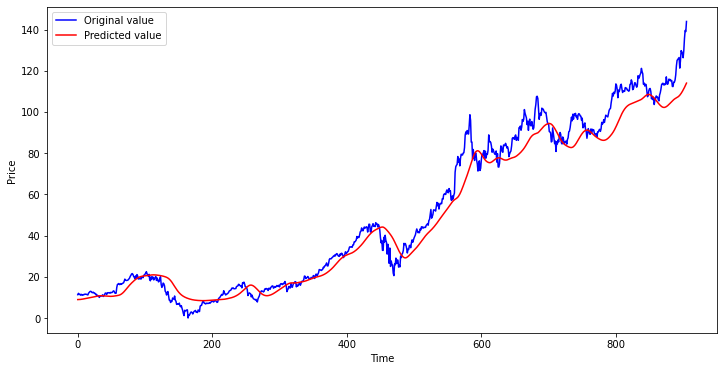

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label= 'Original value')
plt.plot(y_prediction,'r' , label= 'Predicted value')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [ ]:
def get_ticker(name):
    company = finance.Ticker(name)  # google
    return company
 
 
# Project Details
st.title("Build and Deploy Stock Market App Using Streamlit")
st.header("A Basic Data Science Web Application")
st.sidebar.header("AhmedSamy's \n StockWeb")
 
company1 = get_ticker("GOOGL")
company2 = get_ticker("MSFT")
 
# fetches the data: Open, Close, High, Low and Volume
google = finance.download("GOOGL", start="2021-10-01", end="2021-10-01")
microsoft = finance.download("MSFT", start="2021-10-01", end="2021-10-01")
 
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
data1 = company1.history(period="3mo")
data2 = company2.history(period="3mo")
 
# markdown syntax
st.write("""
### Google
""")
 
# detailed summary on Google
st.write(company1.info['longBusinessSummary']) 
st.write(google)
 
# plots the graph
st.line_chart(data1.values) 
 
st.write("""
### Microsoft
""")
st.write(company2.info['longBusinessSummary'], "\n", microsoft)
st.line_chart(data2.values)